In [ ]:
pip install segmentation-models

In [ ]:
!pip install --force-reinstall tensorflow==2.10.0

In [2]:
import os
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm
import keras

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [3]:
size_x = 128
size_y = 128
n_classes = 5

In [4]:
# Python version
print('Tf Keras: {}'.format(tf.keras.__version__))
print('TensorFlow: {}'.format(tf.__version__))

Tf Keras: 2.12.0
TensorFlow: 2.12.0


In [9]:
image_training = []
counter = 0
directory_path = "/content/drive/MyDrive/dataset/ADEChallengeData2016/images/training"

for img_path in sorted(glob.glob(os.path.join(directory_path, "*.jpg"))):
    if counter < 4300:
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (size_x, size_y))
        img = img.astype('float32')
        img = img/255
        image_training.append(img)
        counter +=1
    else:
        break

image_train = np.array(image_training)

In [ ]:
print(image_train.shape)
plt.figure(figsize=(5,5))
plt.imshow(image_train[1], cmap = 'gray')

In [8]:
mask_training = []
counter = 0
directory_path = "/content/drive/MyDrive/dataset/ADEChallengeData2016/annotations/training"

for img_path in sorted(glob.glob(os.path.join(directory_path, "*.png"))):
    if counter < 4300:
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (size_x, size_y))
        img = img.astype('float32')
        img = img/255
        mask_training.append(img)
        counter +=1
    else:
        break

mask_train = np.array(mask_training)

In [ ]:
print(mask_train.shape)
plt.figure(figsize=(5,5))
plt.imshow(mask_train[1], cmap = 'gray')

In [ ]:
#image_validation = []
#counter = 0
#directory_path = "/content/drive/MyDrive/dataset/ADEChallengeData2016/images/validation"

#for img_path in sorted(glob.glob(os.path.join(directory_path, "*.jpg"))):
  #if counter < 500:
         #img = cv2.imread(img_path, 0)     
         #img = cv2.resize(img, (size_x, size_y))
         #img = img.astype('float32')
         #img = img/255
         #image_validation.append(img)
         #counter += 1
  #else:
    #break

#image_valid = np.array(image_validation)

In [ ]:
#print(image_valid.shape)
#plt.figure(figsize=(5,5))
#plt.imshow(image_valid[1], cmap = 'gray')

In [ ]:
#mask_validation = []
#counter = 0
#directory_path = "/content/drive/MyDrive/dataset/ADEChallengeData2016/annotations/validation"

#for img_path in sorted(glob.glob(os.path.join(directory_path, "*.png"))):
  #if counter < 500:
        #img = cv2.imread(img_path, 0)       
        #img = cv2.resize(img, (size_x, size_y))
        #img = img.astype('float32')
        #img = img/255
        #mask_validation.append(img)
        #counter += 1
  #else:
    #break
       
#mask_valid = np.array(mask_validation)

In [ ]:
#print(mask_valid.shape)
#plt.figure(figsize=(5,5))
#plt.imshow(mask_valid[1], cmap = 'gray')

In [10]:
#Questo codice utilizza la funzione LabelEncoder per codificare le labels presenti nelle maschere. La mask_train viene prima ridimensionata con il comando reshape
#in modo che le labels siano disposte come un array 1D e poi passate al metodo fit_transform del modello di codifica delle labels.
#Il risultato codificato viene poi ridimensionato nuovamente alla sua forma originale con un reshape.
#La funzione np.unique viene utilizzata alla fine per visualizzare le labels.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_train.shape
train_masks_reshaped = mask_train.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150])

In [11]:
train_images = np.expand_dims(image_train, axis=3)
print(train_images.shape)
train_masks = np.expand_dims(train_masks_encoded_original_shape, axis=3)
print(train_masks.shape)

(4300, 128, 128, 1)
(4300, 128, 128, 1)


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#n, h, w = mask_valid.shape
#valid_masks_reshaped = mask_valid.reshape(-1,1)
#valid_masks_reshaped_encoded = labelencoder.fit_transform(valid_masks_reshaped)
#valid_masks_encoded_original_shape = valid_masks_reshaped_encoded.reshape(n, h, w)
#np.unique(valid_masks_encoded_original_shape)

In [ ]:
#valid_images = np.expand_dims(image_valid, axis = 3)
#print(valid_images.shape)
#valid_masks = np.expand_dims(valid_masks_encoded_original_shape, axis = 3)
#print(valid_masks.shape)

In [12]:
from sklearn.model_selection import train_test_split
x1, x_valid, y1, y_valid = train_test_split(train_images, train_masks, test_size = 0.1, random_state = 0)


x_train, x_do_not_use, y_train, y_do_not_use = train_test_split(x1, y1, test_size = 0.1, random_state = 0)

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(3483, 128, 128, 1)
(3483, 128, 128, 1)
(430, 128, 128, 1)
(430, 128, 128, 1)


In [13]:
#Questo codice trasforma i due array di labels di immagini, y_train e y_valid, in formato one-hot.
#Il comando np.clip viene utilizzato per limitare i valori in y_train e y_valid a un intervallo compreso tra 0 e n_classes-1, altrimenti da errore.
#Successivamente, l'array one-hot viene generato utilizzando la funzione np.eye, che crea una matrice identità di dimensione n_classes e utilizza l'array di labels
#limitate (y_train_clipped o y_valid_clipped) come indici per selezionare i vettori corrispondenti dalla matrice one-hot.
#Infine, l'array one-hot viene ridimensionato con il comando reshape per adattarsi alle dimensioni originali dell'array di labels.
def to_one_hot(labels, num_classes):
    # Limita i valori delle etichette all'intervallo [0, num_classes-1]
    clipped_labels = np.clip(labels, 0, num_classes-1)
    # Crea una matrice identità di dimensione num_classes
    identity_matrix = np.eye(num_classes)
    # Seleziona i vettori corrispondenti dalle righe della matrice identità
    one_hot = identity_matrix[clipped_labels]
    return one_hot

# Trasforma i due array di labels di immagini, y_train e y_valid, in formato one-hot
y_train_cat = to_one_hot(y_train, n_classes).reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))
print(y_train_cat.shape)

y_valid_cat = to_one_hot(y_valid, n_classes).reshape((y_valid.shape[0], y_valid.shape[1], y_valid.shape[2], n_classes))
print(y_valid_cat.shape)

(3483, 128, 128, 5)
(430, 128, 128, 5)


In [14]:
###Model 
backbone = 'resnet34'
preprocess_input = sm.get_preprocessing(backbone)

In [15]:
x_train = preprocess_input(x_train)
x_valid = preprocess_input(x_valid)

In [16]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

In [17]:
inputs = Input((size_x, size_y, 1))
#s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
s = inputs

#Contraction path
c1 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)
    
c2 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
     
c3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
     
c4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
#c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
#c5 = Dropout(0.3)(c5)
#c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
#Expansive path 
#u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
##u6 = concatenate([u6, c4])
#c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
#c6 = Dropout(0.2)(c6)
#c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
model = Model(inputs=[inputs], outputs=[outputs])

In [ ]:
#Definisco la metrica per l'IOU e il focal loss, con il focal ho una validation loss più bassa ma la segmentatzione a livello visivo è peggiore
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25, 0.25, 0.25, 0.25])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
Metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
model.compile(optimizer = 'adam', loss = total_loss, metrics = ['accuracy', Metrics])
model.summary()

In [ ]:
!pip install visualkeras          # installazione della libreria visualkeras in maniera manuale
import visualkeras                # import della libreria keras, utilizzata per la visualizzazione 3D del modello

visualkeras.layered_view(model, legend=True,shade_step=25,spacing=20)    # visuale della CNN come modello 3D

In [22]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.h5", 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max')

In [ ]:
history = model.fit(x_train, 
          y_train_cat,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(x_valid, y_valid_cat),
          callbacks=[checkpoint])

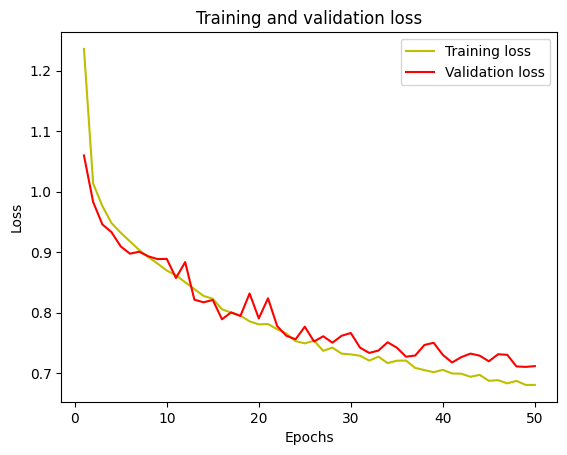

In [ ]:
loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, valid_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

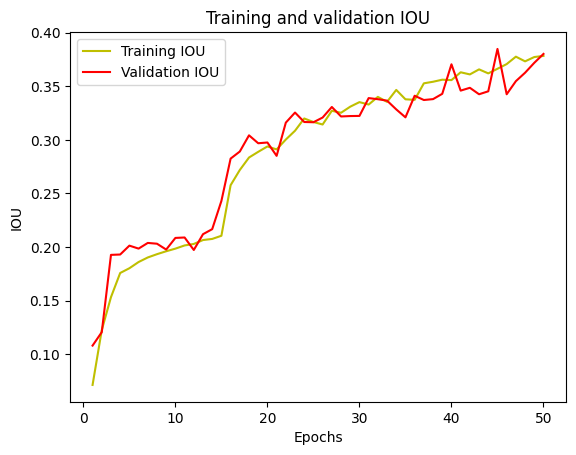

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']
plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(x_valid)
prediction.shape

14/14 [==============================] - 1s 15ms/step


(430, 128, 128, 5)

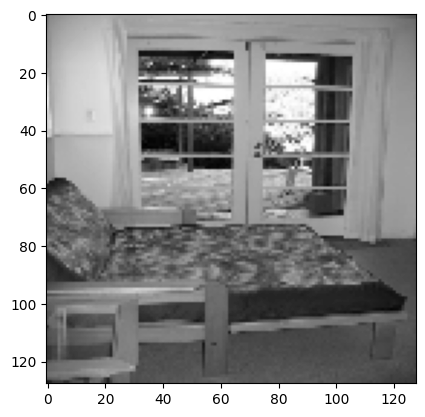

In [ ]:
plt.imshow(x_valid[200].reshape(size_x, size_y), cmap = 'gray')

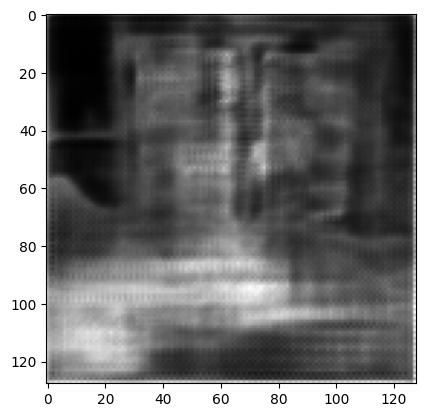

In [ ]:
plt.imshow(prediction[200][:,:,0], cmap = 'gray')

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' KB')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' MB')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
# Save model to a HDF5 file format
import os
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

saved_model = "progetto.h5"
model.save(saved_model)
!ls

best_model.h5  progetto.h5		 progetto.tflite  x_test_2.npy
drive	       progetto_quantDyn.tflite  sample_data	  y_test_2.npy


In [ ]:
# Download saved model
try:
  from google.colab import files
  files.download(saved_model)
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert to a TensorFlow Lite model with no quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the unquantized model:
import pathlib
tflite_models_dir = pathlib.Path("./")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"progetto.tflite"
tflite_model_file.write_bytes(tflite_model)

# Estimate size
convert_bytes(get_file_size(tflite_model_file), "MB")

File size: 0.473 MB


In [ ]:
# Convert using dynamic range quantization
# Now let's enable the default optimizations flag to quantize all fixed parameters (such as weights)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_quantDyn = converter.convert()

# Save the dynamic quantized model:
import pathlib
tflite_models_dir = pathlib.Path("./")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_quantDyn_file = tflite_models_dir/"progetto_quantDyn.tflite"
tflite_model_quantDyn_file.write_bytes(tflite_model_quantDyn)

# Estimate size
convert_bytes(get_file_size(tflite_model_quantDyn_file), "MB")

File size: 0.139 MB


In [ ]:
np.save("x_test_2.npy", x_valid)
np.save("y_test_2.npy", y_valid_cat)

In [ ]:
# Download test files
try:
  from google.colab import files
  files.download("x_test_2.npy")
  files.download("y_test_2.npy")
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>